In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [65]:
def linear(x, k, b):
    return k * x + b


def exponential(x, x0, k, b):
    return x0 * np.e ** (k * x) + b


def sqroot(x, a):
    return a * x ** 0.5

# Графики $Q(\Delta P)$

In [62]:
data3 = pd.read_csv('Q(dP)[3mm].csv')
data3 = data3.loc[data3['Q'] != '?']
data3['Q'] = pd.to_numeric(data3['Q'])
data3['P'] = data3['dl'] * data3['k'] * 9.8
data3 = data3.sort_values(by=['P'])

data4 = pd.read_csv('Q(dP)[4mm].csv')
data4 = data4.loc[data4['Q'] != '?']
data4['Q'] = pd.to_numeric(data4['Q'])
data4['P'] = data4['dl'] * data4['k'] * 9.8
data4 = data4.sort_values(by=['dl'])

data5 = pd.read_csv('Q(dP)[5mm].csv')
data5 = data5.loc[data5['Q'] != '?']
data5['Q'] = pd.to_numeric(data5['Q'])
data5['P'] = data5['dl'] * data5['k'] * 9.8
data5 = data5.sort_values(by=['dl'])

## Ламинарность

In [89]:
a, b = 0, 10
P3 = data3['P']
Q3 = data3['Q']
p3 = np.linspace(P3[a:b].min() - 20, P3[a:b].max() + 50, 300)
popt3, pcov = curve_fit(linear, P3[a:b], Q3[a:b])

a, b = 0, 9
P4 = data4['P']
Q4 = data4['Q']
p4 = np.linspace(P4[a:b].min() - 20, P4[a:b].max() + 50, 300)
popt4, pcov = curve_fit(linear, P4[a:b], Q4[a:b])

a, b = 0, 7
P5 = data5['P']
Q5 = data5['Q']
p5 = np.linspace(P5[a:b].min() - 20, P5[a:b].max() + 20, 300)
popt5, pcov = curve_fit(linear, P5[a:b], Q5[a:b])

## Турбулентность

In [86]:
a = 10
p3t = np.linspace(P3[a:].min() - 20, P3[a:].max() + 20, 300)
popt3t, pcov = curve_fit(sqroot, P3[a:], Q3[a:])

a = 9
p4t = np.linspace(P4[a:].min() - 20, P4[a:].max() + 20, 300)
popt4t, pcov = curve_fit(sqroot, P4[a:], Q4[a:])

a = 7
p5t = np.linspace(P5[a:].min() - 20, P5[a:].max() + 20, 300)
popt5t, pcov = curve_fit(sqroot, P5[a:], Q5[a:])

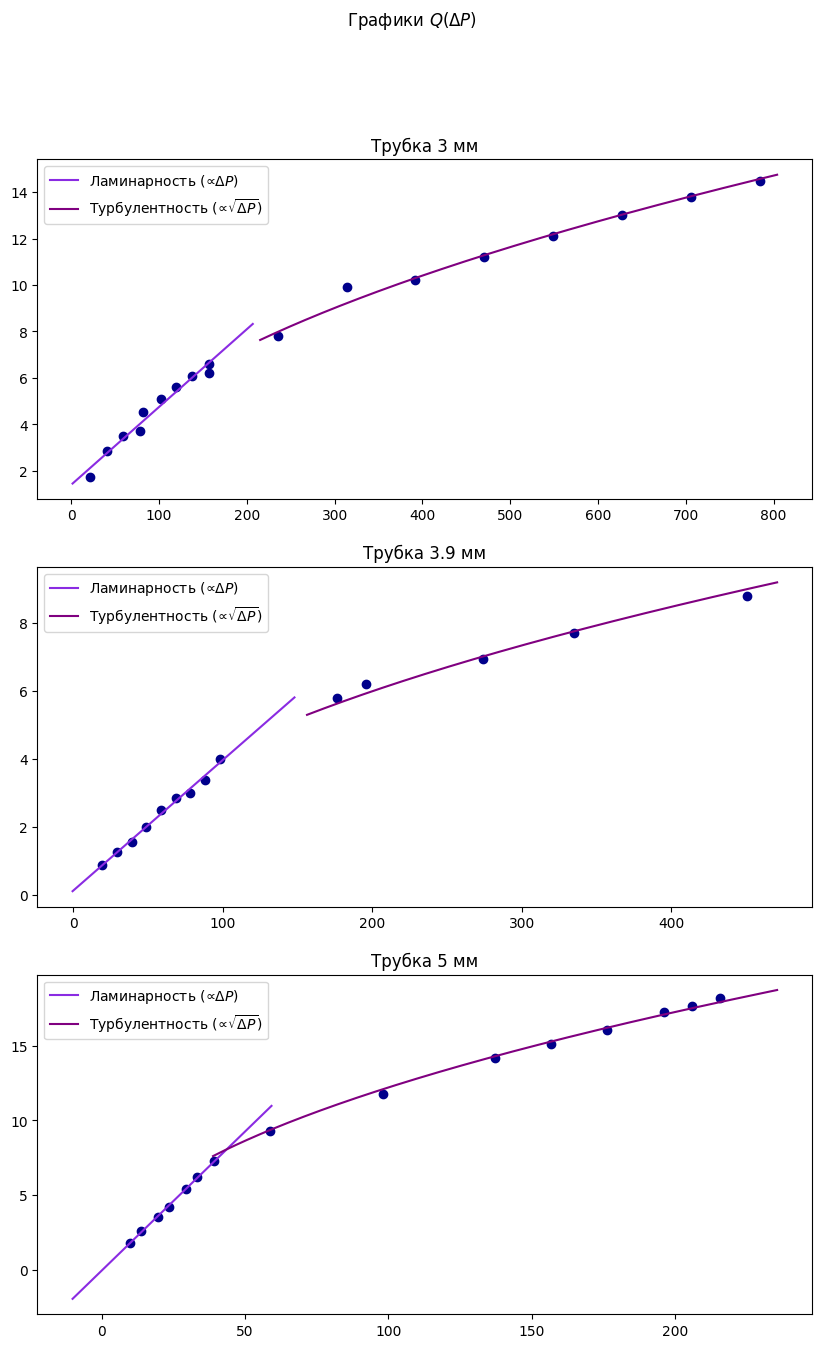

In [101]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
fig.suptitle(r'Графики $Q(\Delta P)$')

axs[0].plot(P3, Q3, 'o', color='darkblue')
axs[0].plot(p3, linear(p3, *popt3), color='blueviolet', label=r'Ламинарность $(\varpropto \Delta P)$')
axs[0].plot(p3t, sqroot(p3t, *popt3t), color='purple', label=r'Турбулентность $(\varpropto \sqrt{\Delta P})$')
axs[0].set_title('Трубка 3 мм')
axs[0].legend()

axs[1].plot(P4, Q4, 'o', color='darkblue')
axs[1].plot(p4, linear(p4, *popt4), color='blueviolet', label=r'Ламинарность $(\varpropto \Delta P)$')
axs[1].plot(p4t, sqroot(p4t, *popt4t), color='purple', label=r'Турбулентность $(\varpropto \sqrt{\Delta P})$')
axs[1].set_title('Трубка 3.9 мм')
axs[1].legend()

axs[2].plot(P5, Q5, 'o', color='darkblue')
axs[2].plot(p5, linear(p5, *popt5), color='blueviolet', label=r'Ламинарность $(\varpropto \Delta P)$')
axs[2].plot(p5t, sqroot(p5t, *popt5t), color='purple', label=r'Турбулентность $(\varpropto \sqrt{\Delta P})$')
axs[2].set_title('Трубка 5 мм')
axs[2].legend()
plt.savefig('graphs\Q(dP).png')